# **Обработка данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("Данные.xlsx")

In [2]:
df

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,180,1950,NaN
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,228,1950,NaN
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,252,1950,NaN
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01-01,240,1950,NaN
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01-01,252,1950,NaN
...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12-01,180,1500,NaN
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,180,1500,NaN
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,156,1500,NaN
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,192,1500,NaN


In [3]:
 df.isnull().any()

 #только в Доходе есть пропуски

ID                    False
FIO                   False
Профессия             False
Разряд                False
Оборудование          False
Класс вредности       False
Месяц                 False
Отработанные часы     False
Объем производства    False
Доход (руб.)           True
dtype: bool

# **Анализ данных в датасете**

Медиана: 27207.67
Среднее: 30211.72210831721


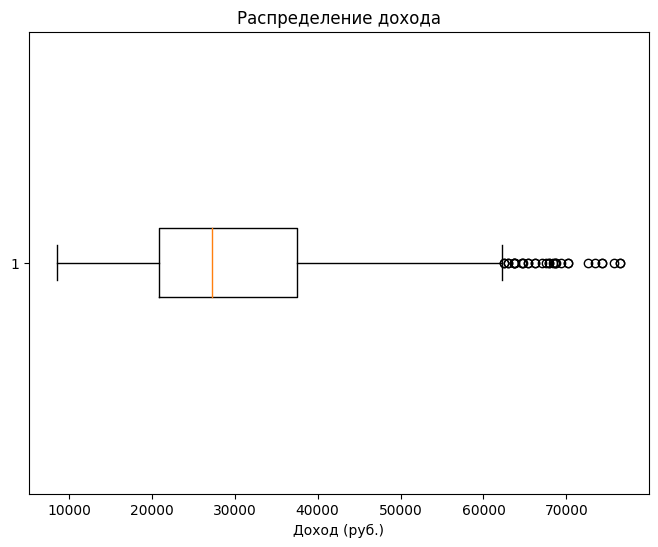

In [4]:
# Создание df_cleared без NaN значений в столбце "Доход (руб.)"
df_cleared = df.dropna(subset=["Доход (руб.)"])

# Вывод медианы и среднего значения столбца "Доход (руб.)"
median_income = df_cleared["Доход (руб.)"].median()
mean_income = df_cleared["Доход (руб.)"].mean()
print(f"Медиана: {median_income}")
print(f"Среднее: {mean_income}")

# Построение бар-графика с усами
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleared["Доход (руб.)"], vert=False)
plt.title("Распределение дохода")
plt.xlabel("Доход (руб.)")
plt.show()

In [5]:
df_cleared.shape

(1551, 10)

In [6]:
df_cleared["Доход (руб.)"].nunique()

593

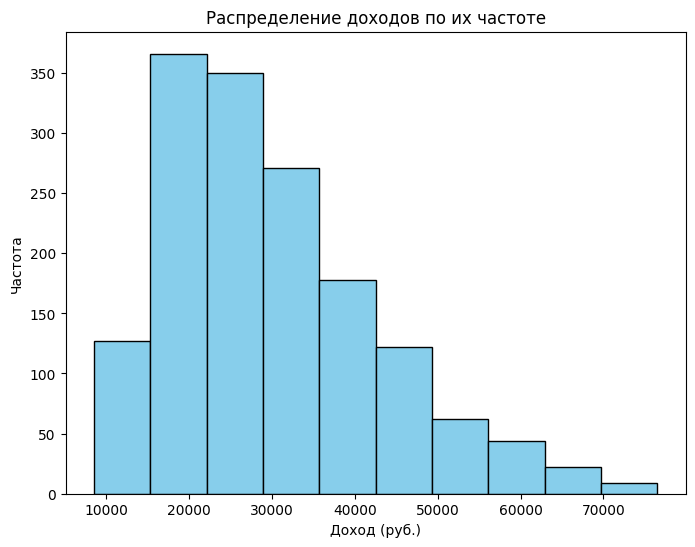

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df_cleared["Доход (руб.)"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Доход (руб.)")
plt.ylabel("Частота")
plt.title("Распределение доходов по их частоте")
plt.show()

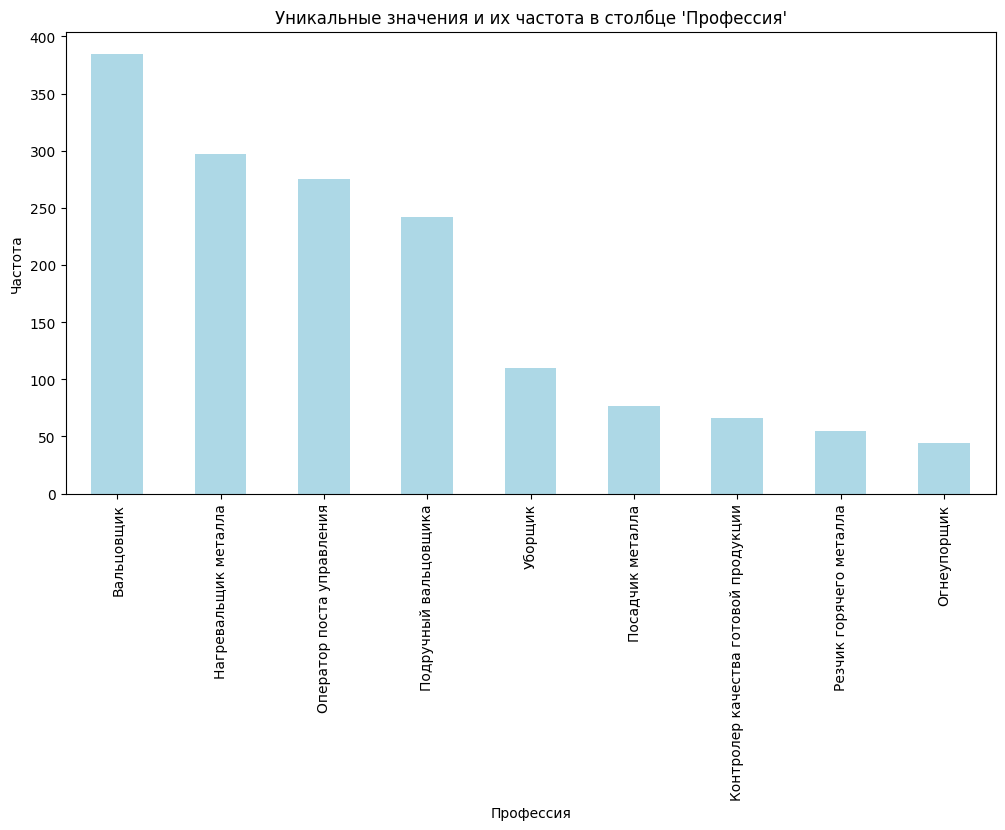

In [8]:
plt.figure(figsize=(12, 6))
df_cleared['Профессия'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel("Профессия")
plt.ylabel("Частота")
plt.title("Уникальные значения и их частота в столбце 'Профессия'")
plt.show()


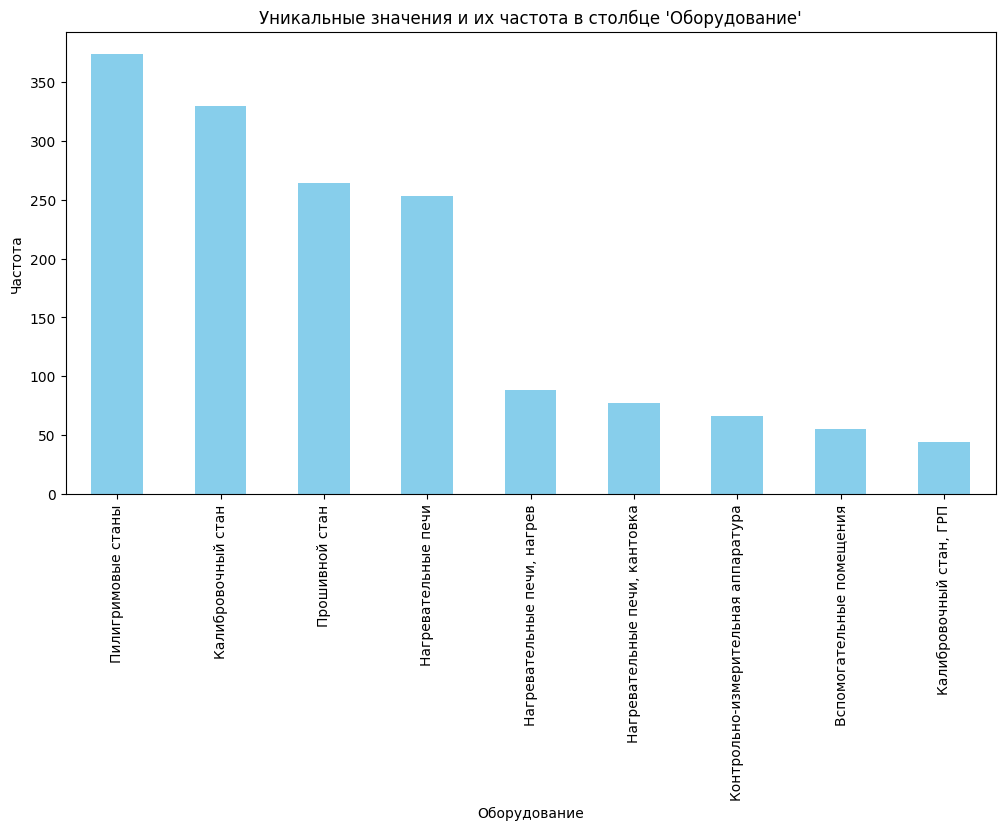

In [9]:
plt.figure(figsize=(12, 6))
df_cleared['Оборудование'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Оборудование")
plt.ylabel("Частота")
plt.title("Уникальные значения и их частота в столбце 'Оборудование'")
plt.show()


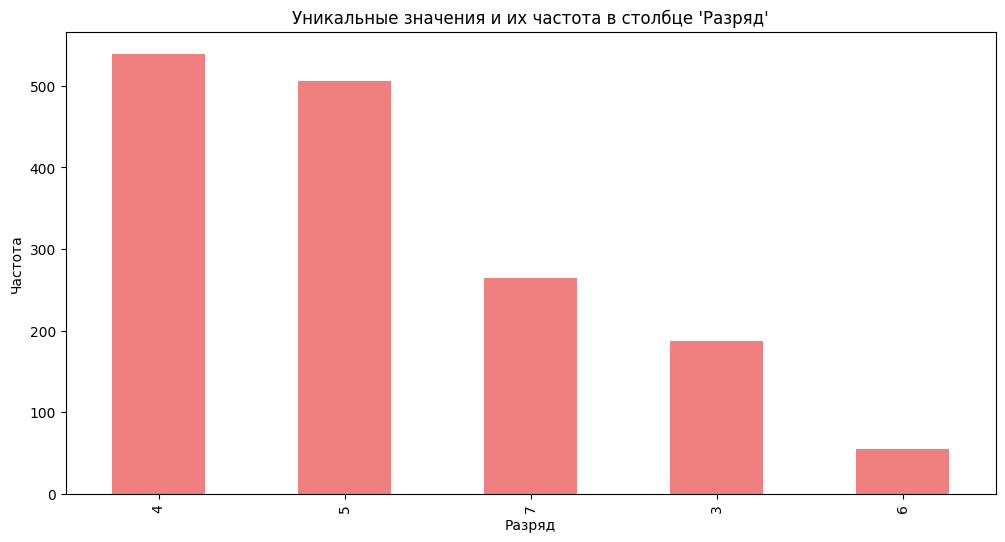

In [10]:
plt.figure(figsize=(12, 6))
df_cleared['Разряд'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel("Разряд")
plt.ylabel("Частота")
plt.title("Уникальные значения и их частота в столбце 'Разряд'")
plt.show()


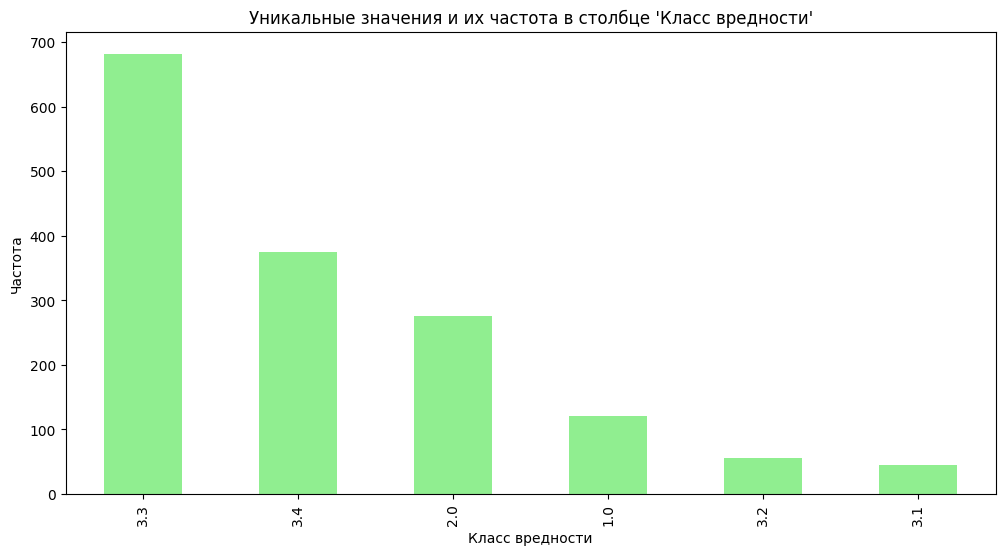

In [11]:
plt.figure(figsize=(12, 6))
df_cleared['Класс вредности'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel("Класс вредности")
plt.ylabel("Частота")
plt.title("Уникальные значения и их частота в столбце 'Класс вредности'")
plt.show()


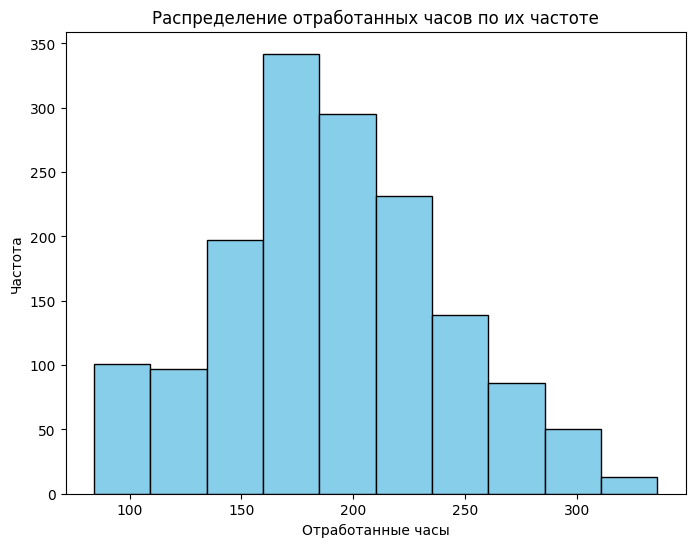

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df_cleared["Отработанные часы"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Отработанные часы")
plt.ylabel("Частота")
plt.title("Распределение отработанных часов по их частоте")
plt.show()

In [13]:
df_cleared['Объем производства'].nunique()

11

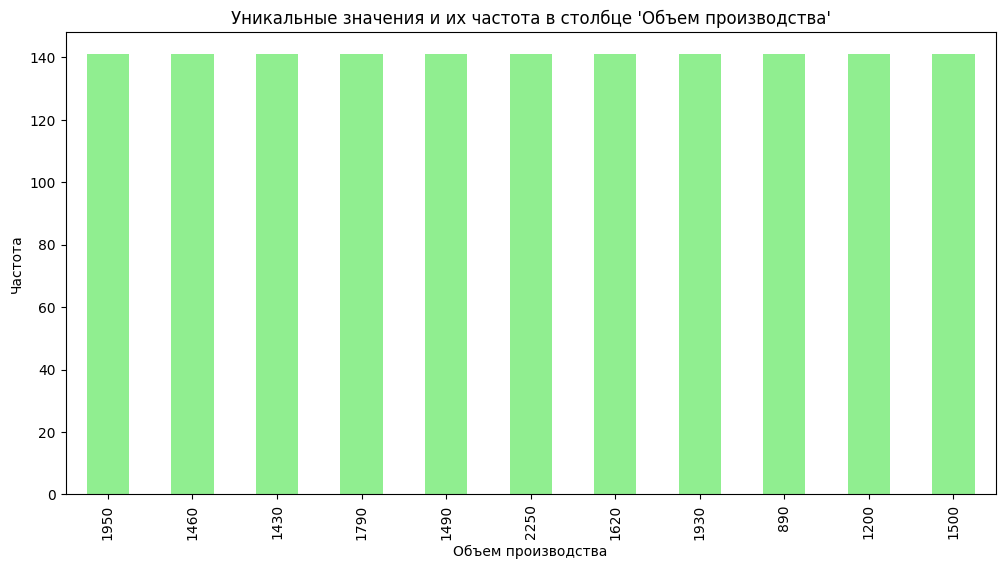

In [14]:
plt.figure(figsize=(12, 6))
df_cleared['Объем производства'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel("Объем производства")
plt.ylabel("Частота")
plt.title("Уникальные значения и их частота в столбце 'Объем производства'")
plt.show()


# **Построение моделей прогнозирования дохода**

Для начала, рассмотрим простую модель, где доход прогнозируется лишь от числа наработанных часов

In [15]:
import statsmodels.api as sm

# Определяем зависимую (y) и независимую (x) переменные
x = df_cleared['Отработанные часы']
y = df_cleared['Доход (руб.)']

# Добавляем intercept к x
x = sm.add_constant(x)

# Создаем модель линейной регрессии
model = sm.OLS(y, x).fit()

# Выводим коэффициенты регрессии, R^2 и p-value
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Доход (руб.)   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     8972.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:45:34   Log-Likelihood:                -15373.
No. Observations:                1551   AIC:                         3.075e+04
Df Residuals:                    1549   BIC:                         3.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.689e+04    512.51

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Определяем зависимую (y) и независимую (x) переменные
x = np.array(df_cleared['Отработанные часы']).reshape(-1, 1)
y = df_cleared['Доход (руб.)']

# Создаем модель линейной регрессии
model = LinearRegression()
model.fit(x, y)

# Получаем предсказания
y_pred = model.predict(x)

# Выводим коэффициенты регрессии, R^2 и p-value
print('Коэффициенты регрессии:', model.coef_)
print('R^2:', r2_score(y, y_pred))


Коэффициенты регрессии: [245.71299194]
R^2: 0.852772440472956


# Построение финальной модели

На основании анализа данных можно предположить, что доход работника будет зависить от его должности, разряда и класса вредности, поэтому введем этим параметры как дамми-переменные

In [17]:
# Создание дамми-переменных для столбцов 'Профессия', 'Разряд' и 'Класс вредности'
df_with_dummies = pd.get_dummies(df_cleared, columns=['Профессия', 'Разряд', 'Класс вредности'], drop_first=True)

In [18]:
# Подготовка данных для регрессии
X = df_with_dummies.drop(columns=['Доход (руб.)','ID','FIO','Оборудование','Месяц', 'Объем производства'])  # Предикторы, включая дамми-переменные
y = df_with_dummies['Доход (руб.)']

In [19]:
X.shape

(1551, 18)

In [20]:
X.columns

Index(['Отработанные часы', 'Профессия_Контролер качества готовой продукции',
       'Профессия_Нагревальщик металла', 'Профессия_Огнеупорщик',
       'Профессия_Оператор поста управления',
       'Профессия_Подручный вальцовщика', 'Профессия_Посадчик металла',
       'Профессия_Резчик горячего металла', 'Профессия_Уборщик', 'Разряд_4',
       'Разряд_5', 'Разряд_6', 'Разряд_7', 'Класс вредности_2.0',
       'Класс вредности_3.1', 'Класс вредности_3.2', 'Класс вредности_3.3',
       'Класс вредности_3.4'],
      dtype='object')

In [21]:
model = LinearRegression()
model.fit(X, y)

a = model.intercept_


print("a:", a)

a: -25788.483117297503


In [22]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.9487351769849338


In [23]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
print("R^2:", r_squared)


R^2: 0.9487351769849338


In [24]:
model.coef_


array([  245.9755928 ,   290.23778812,  2261.9758462 ,  1517.46929258,
        1176.98141823,  -264.66744066,  2062.9083241 ,  2464.73482801,
        -242.89441026,  2102.58205189,  4537.41361711,  7262.85631181,
       10519.32750768,  1176.98141823,  1517.46929258,  2464.73482801,
        5402.6300938 ,  4324.8841703 ])

In [25]:
# Создание дамми-переменных для столбцов 'Профессия', 'Разряд' и 'Класс вредности' в исходном датафрейме df
df_with_dummies = pd.get_dummies(df, columns=['Профессия', 'Разряд', 'Класс вредности'], drop_first=True)

# Подготовка данных для предсказания
X_pred = df_with_dummies.drop(columns=['Доход (руб.)','ID','FIO','Оборудование','Месяц', 'Объем производства'])

# Получение индексов строк с пропущенными значениями в столбце 'Доход (руб.)'
missing_indices = df['Доход (руб.)'][df['Доход (руб.)'].isnull()].index

In [26]:
X_pred.columns

Index(['Отработанные часы', 'Профессия_Контролер качества готовой продукции',
       'Профессия_Нагревальщик металла', 'Профессия_Огнеупорщик',
       'Профессия_Оператор поста управления',
       'Профессия_Подручный вальцовщика', 'Профессия_Посадчик металла',
       'Профессия_Резчик горячего металла', 'Профессия_Уборщик', 'Разряд_3',
       'Разряд_4', 'Разряд_5', 'Разряд_6', 'Разряд_7', 'Разряд_8',
       'Класс вредности_2.0', 'Класс вредности_3.1', 'Класс вредности_3.2',
       'Класс вредности_3.3', 'Класс вредности_3.4'],
      dtype='object')

In [27]:
X_pred.shape

(2400, 20)

В X_pred есть разряд_3 и разряд_8, но в модели на этапе обучения не было таких разрядов

Значит эти разряды есть только в тех строках, которые имели пропуск для дохода

В случае, если эти разряды присутствуют у работника, их стоит заменить на ближайший к нему

In [28]:
# Добавляем новые колонки 'Разряд_7' и 'Разряд_4' в X_pred с соответствующими значениями
X_pred['Разряд_7'] = X_pred['Разряд_8']
X_pred['Разряд_4'] = X_pred['Разряд_3']

In [29]:
# Удаляем колонки 'Разряд_3' и 'Разряд_8' из X_pred
X_pred = X_pred.drop(['Разряд_3', 'Разряд_8'], axis=1)

In [30]:
X_pred.shape

(2400, 18)

In [31]:
X_pred.columns

Index(['Отработанные часы', 'Профессия_Контролер качества готовой продукции',
       'Профессия_Нагревальщик металла', 'Профессия_Огнеупорщик',
       'Профессия_Оператор поста управления',
       'Профессия_Подручный вальцовщика', 'Профессия_Посадчик металла',
       'Профессия_Резчик горячего металла', 'Профессия_Уборщик', 'Разряд_4',
       'Разряд_5', 'Разряд_6', 'Разряд_7', 'Класс вредности_2.0',
       'Класс вредности_3.1', 'Класс вредности_3.2', 'Класс вредности_3.3',
       'Класс вредности_3.4'],
      dtype='object')

In [32]:
# Заполнение пропущенных значений
predicted_values = model.predict(X_pred)
df.loc[missing_indices, 'Доход (руб.)'] = predicted_values[missing_indices]

In [33]:
df

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,180,1950,18244.229177
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,228,1950,30051.057631
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,252,1950,35954.471859
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01-01,240,1950,38405.394839
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01-01,252,1950,41335.328922
...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12-01,180,1500,34409.081189
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,180,1500,34409.081189
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,156,1500,28505.666961
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,192,1500,37360.788302


In [34]:
 df.isnull().any()

 #пропусков нет

ID                    False
FIO                   False
Профессия             False
Разряд                False
Оборудование          False
Класс вредности       False
Месяц                 False
Отработанные часы     False
Объем производства    False
Доход (руб.)          False
dtype: bool

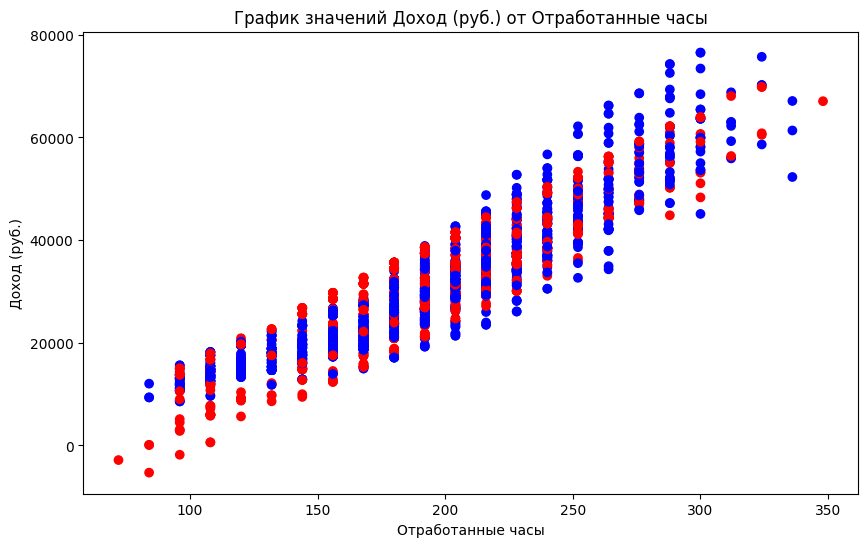

In [35]:
# Создайте график точечной диаграммы
plt.figure(figsize=(10, 6))
colors = ['b' if i not in missing_indices else 'r' for i in df.index]
plt.scatter(df['Отработанные часы'], df['Доход (руб.)'], color=colors)

# Добавьте название осей и заголовок
plt.xlabel('Отработанные часы')
plt.ylabel('Доход (руб.)')
plt.title('График значений Доход (руб.) от Отработанные часы')

# Показать график
plt.show()


**Красные точки - значения, спрогнозированные моделью для пропусков**

**Синие точки - значения, которые уже были в датасете**

**Сразу видна проблем: часть точек стала ниже нуля, поэтому нужно ввести минимальную ЗП равную МРОТ**

In [36]:
#Есть значения меньше нуля, поэтому нужно добавить условие минимальной заработной платы
# Преобразование столбца 'Месяц' в формат времени Pandas
df['Месяц'] = pd.to_datetime(df['Месяц'])

for index, row in df.iterrows():
    if index in missing_indices:
        if row['Доход (руб.)'] < 13890 and row['Месяц'] < pd.Timestamp('2022-06-01'):
            df.at[index, 'Доход (руб.)'] = 13890
        elif row['Доход (руб.)'] < 15279 and row['Месяц'] >= pd.Timestamp('2022-06-01'):
            df.at[index, 'Доход (руб.)'] = 15279
df


,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,180,1950,18244.229177
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,228,1950,30051.057631
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,252,1950,35954.471859
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01-01,240,1950,38405.394839
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01-01,252,1950,41335.328922
...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12-01,180,1500,34409.081189
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,180,1500,34409.081189
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,156,1500,28505.666961
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,192,1500,37360.788302


In [37]:
# #Есть значения меньше нуля, поэтому нужно добавить условие минимальной заработной платы

# df['Месяц'] = pd.to_datetime(df['Месяц'])

# for index, row in df.iterrows():
#     if row['Доход (руб.)'] < 13890 and row['Месяц'] < pd.Timestamp('2022-06-01'):
#         df.at[index, 'Доход (руб.)'] = 13890
#     elif row['Доход (руб.)'] < 15279 and row['Месяц'] >= pd.Timestamp('2022-06-01'):
#         df.at[index, 'Доход (руб.)'] = 15279
# df


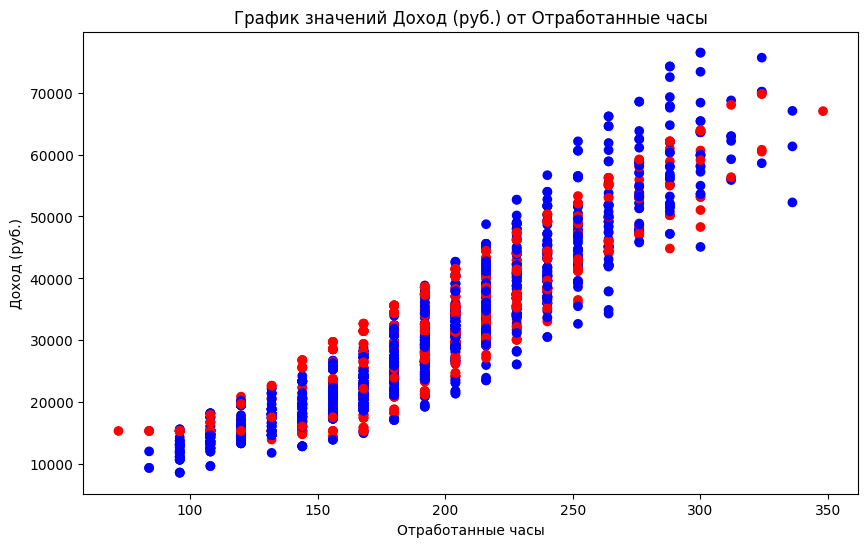

In [38]:
# Создайте график точечной диаграммы
plt.figure(figsize=(10, 6))
colors = ['b' if i not in missing_indices else 'r' for i in df.index]
plt.scatter(df['Отработанные часы'], df['Доход (руб.)'], color=colors)

# Добавьте название осей и заголовок
plt.xlabel('Отработанные часы')
plt.ylabel('Доход (руб.)')
plt.title('График значений Доход (руб.) от Отработанные часы')

# Показать график
plt.show()


**Красные точки - значения, спрогнозированные моделью для пропусков**

**Синие точки - значения, которые уже были в датасете**

Проверка на конкретной вакансии

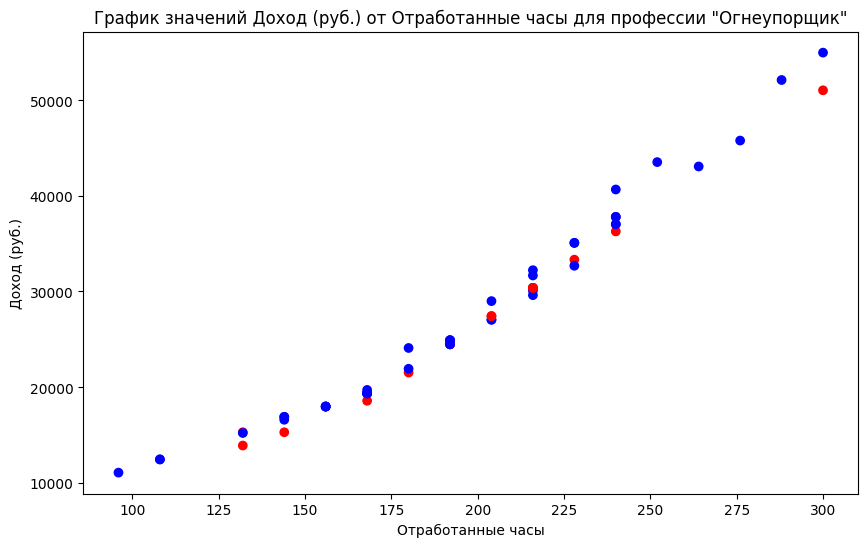

In [55]:
# Отфильтровать DataFrame по значению 'Профессия' равному 'Огнеупорщик'
df_ogneupor = df[df['Профессия'] == 'Огнеупорщик']

# Создать цвета в зависимости от индекса
colors = ['b' if i not in missing_indices else 'r' for i in df_ogneupor.index]

# Создать график точечной диаграммы только для 'Огнеупорщик' с разными цветами
plt.figure(figsize=(10, 6))
plt.scatter(df_ogneupor['Отработанные часы'], df_ogneupor['Доход (руб.)'], color=colors)

# Добавить название осей и заголовок
plt.xlabel('Отработанные часы')
plt.ylabel('Доход (руб.)')
plt.title('График значений Доход (руб.) от Отработанные часы для профессии "Огнеупорщик"')

# Показать график
plt.show()

In [40]:
coefficients = [245.9755928, 290.23778812, 2261.9758462, 1517.46929258, 1176.98141823, -264.66744066, 2062.9083241,
                2464.73482801, -242.89441026, 2102.58205189, 4537.41361711, 7262.85631181, 10519.32750768, 1176.98141823,
                1517.46929258, 2464.73482801, 5402.6300938, 4324.8841703]

features = ['Отработанные часы', 'Профессия_Контролер качества готовой продукции',
            'Профессия_Нагревальщик металла', 'Профессия_Огнеупорщик',
            'Профессия_Оператор поста управления', 'Профессия_Подручный вальцовщика',
            'Профессия_Посадчик металла', 'Профессия_Резчик горячего металла',
            'Профессия_Уборщик', 'Разряд_4', 'Разряд_5', 'Разряд_6', 'Разряд_7',
            'Класс вредности_2.0', 'Класс вредности_3.1', 'Класс вредности_3.2',
            'Класс вредности_3.3', 'Класс вредности_3.4']

df_coef = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})



In [41]:
a_value = -25788.483117297503
df_new = pd.DataFrame({'Feature': ['Константа a'], 'Coefficient': [a_value]})

# Append the new DataFrame to the original DataFrame
df_coef = pd.concat([df_coef, df_new], ignore_index=True)

In [42]:
df_coef

,Feature,Coefficient
0,Отработанные часы,245.975593
1,Профессия_Контролер качества готовой продукции,290.237788
2,Профессия_Нагревальщик металла,2261.975846
3,Профессия_Огнеупорщик,1517.469293
4,Профессия_Оператор поста управления,1176.981418
5,Профессия_Подручный вальцовщика,-264.667441
6,Профессия_Посадчик металла,2062.908324
7,Профессия_Резчик горячего металла,2464.734828
8,Профессия_Уборщик,-242.894410
9,Разряд_4,2102.582052


In [43]:
# Указать путь к файлу Excel
file_path = '/content/Новые_данные.xlsx'

# Сохранить DataFrame в Excel файл
df.to_excel(file_path, index=False)


# **Итог работы**

**Есть понижающие коэффициенты + премии получились отрицательные, хотя модель и хорошо описывает доход, она неидеальна**

Ключевой параметр, с которым коррелирует зарплата - это отработанные часы, независимо от должности, риска или других параметров.

Для двух разрядов коэффициенты не были найдены, так как их не было в выборке для обучения модели.

Значение R^2 для модели составляет более 0.95, что позволяет считать её точной.

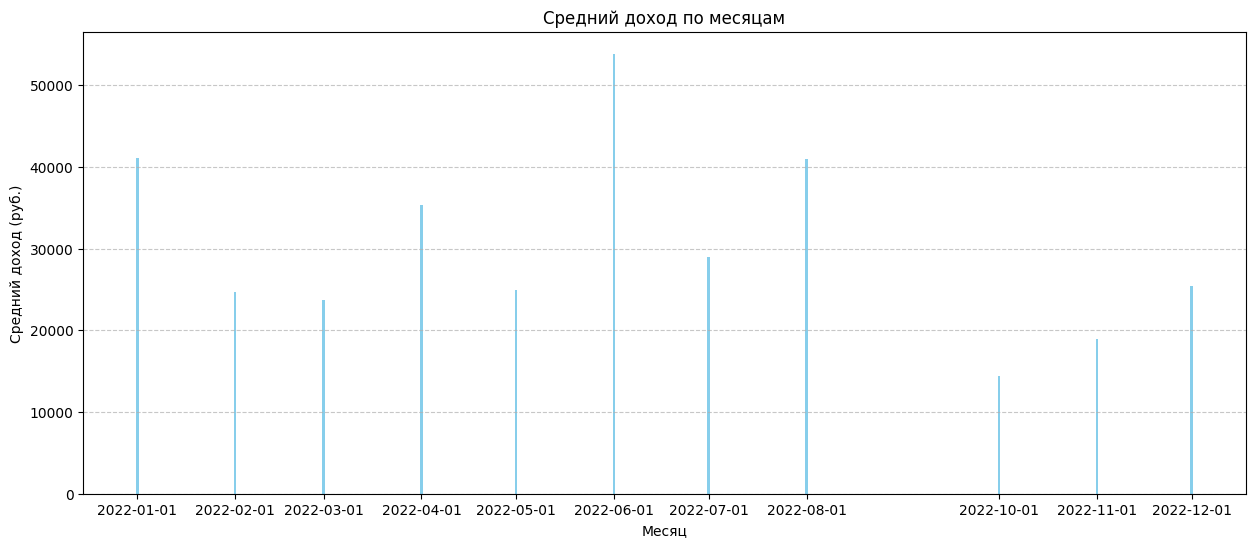

In [44]:
# Группируем данные по месяцу и вычисляем средний доход за месяц
monthly_income = df_cleared.groupby('Месяц')['Доход (руб.)'].mean()

# Строим гистограмму
plt.figure(figsize=(15, 6))
plt.bar(monthly_income.index, monthly_income, color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Средний доход (руб.)')
plt.title('Средний доход по месяцам')
plt.xticks(monthly_income.index)  # Устанавливаем метки по оси x для каждого месяца
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем линии сетки на оси y
plt.show()


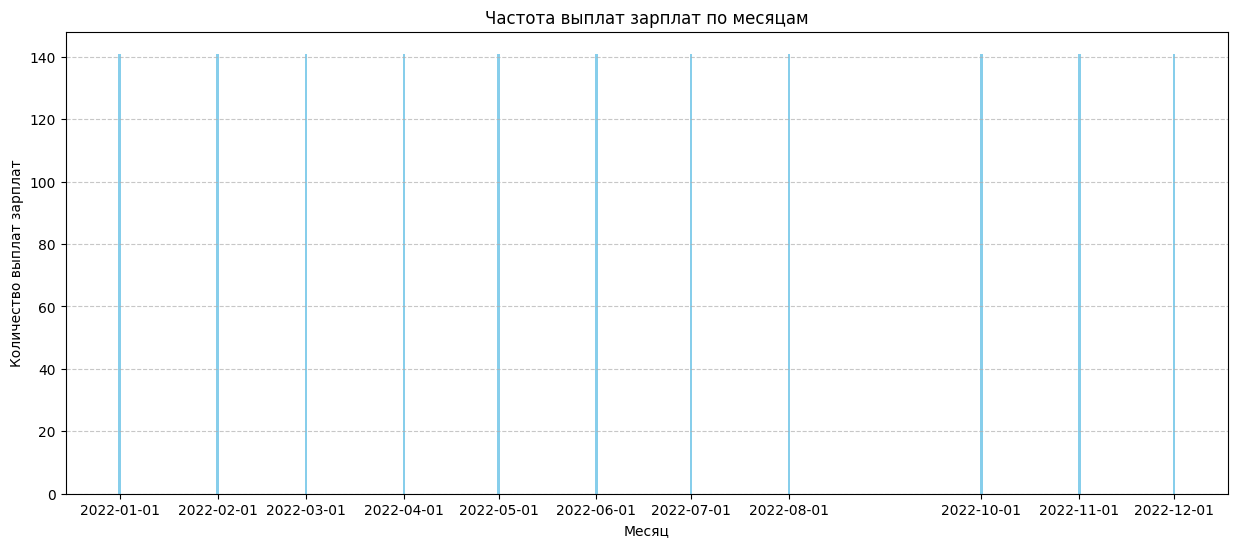

In [45]:
# Группируем данные по месяцу и подсчитываем количество строк в каждой группе (что соответствует количеству выплат в месяц)
monthly_count = df_cleared.groupby('Месяц').size()

# Строим гистограмму
plt.figure(figsize=(15, 6))
plt.bar(monthly_count.index, monthly_count, color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество выплат зарплат')
plt.title('Частота выплат зарплат по месяцам')
plt.xticks(monthly_count.index)  # Устанавливаем метки по оси x для каждого месяца
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем линии сетки на оси y
plt.show()

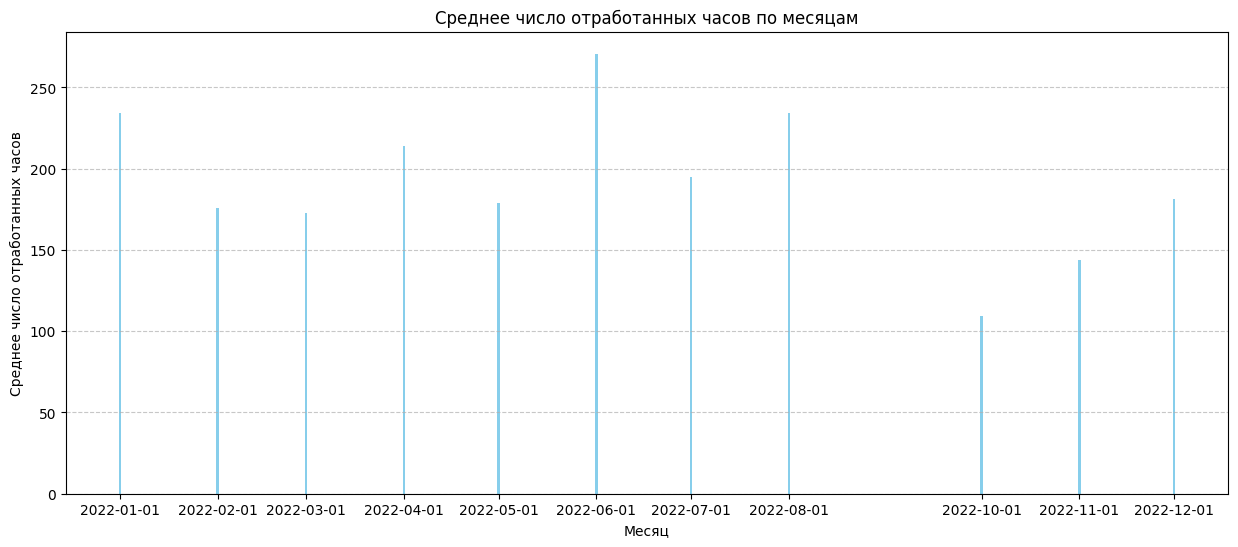

In [46]:
# Группируем данные по месяцу и вычисляем среднее число отработанных часов за месяц
monthly_hours = df_cleared.groupby('Месяц')['Отработанные часы'].mean()

# Строим гистограмму
plt.figure(figsize=(15, 6))
plt.bar(monthly_hours.index, monthly_hours, color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Среднее число отработанных часов')
plt.title('Среднее число отработанных часов по месяцам')
plt.xticks(monthly_hours.index)  # Устанавливаем метки по оси x для каждого месяца
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем линии сетки на оси y
plt.show()

In [47]:
df_with_dummies = pd.get_dummies(df_cleared, columns=['Профессия', 'Разряд', 'Класс вредности', 'Оборудование'], drop_first=True)

In [48]:
# Подготовка данных для регрессии
X = df_with_dummies.drop(columns=['Доход (руб.)','ID','FIO','Месяц', 'Объем производства'])  # Предикторы, включая дамми-переменные
y = df_with_dummies['Доход (руб.)']

In [49]:
model = LinearRegression()
model.fit(X, y)

a = model.intercept_

print("a:", a)

a: -25833.15309144224


In [50]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.948754444743397


In [51]:
model.coef_


array([  245.99948152,   108.27241199,  1764.61018716,   825.79154442,
         398.3479329 ,  -224.64217783,  1619.96273411,  1670.43701456,
        -202.85797868,  2177.87489979,  4618.91874655,  7371.02302421,
       10633.09512535,   398.3479329 ,   825.79154442,  1670.43701456,
        3849.27524696,  3384.57292127,  1542.96735326,  1393.79354243,
         108.27241199,  1348.08083771,  1533.75862881,  1328.52499918,
        1553.45387644,  1427.84542228])